<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joint probability distributions
**Joint probability** distributions describe the probability of two or more random events happening at the same time.

For example, if you have two random variables, X and Y, the joint probability distribution gives the probabilities for each possible pair of values (X, Y).

There are two main types of joint distributions:

*   **Discrete joint distributions**: Represented using a probability mass function (pmf), which assigns probabilities to each possible value pair. The joint probability mass function
$p(x, y)$ is defined for each pair of numbers $(x, y)$ by $$p(x, y) = P(X = x \text{ and }  Y = y)
$$

*   **Continuous joint distributions**: Represented using a probability density function (pdf), that provides the likelihood for every possible pair in a two dimensional space. The joint probability density function $f(x, y)$ for these two variables is a function that satisfies $$f(x,y) \ge 0 \text{ and } \int_{-∞}^{∞}\int_{-∞}^{∞}f(x,y)dxdy=1$$ And for any two-dimensional set A $$P[(X,Y)\in A]=\int\int_A f(x,y)dxdy$$



In real life scenarios, we might want to know how two or more variables interact, and joint distributions help quantify these interactions.

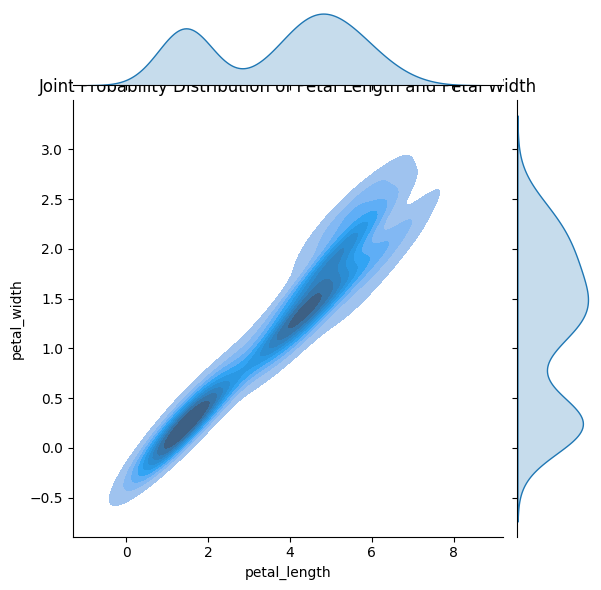

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#load Iris dataset
iris = sns.load_dataset('iris')

#creating joint plot between petal length and petal width
sns.jointplot(data=iris, x='petal_length', y='petal_width', kind='kde', fill=True)
plt.title('Joint Probability Distribution of Petal Length and Petal Width')
plt.show()

In this plot, we see a joint distribution of petal length and petal width for different species of flowers in the dataset. The darker areas indicate higher joint probabilities, which mean these combinations of petal length and petal
 width are more common.

# Correlation and Dependence
Correlation is a statistical measure that indicates the strength and direction of a linear relationship between two random variables. It is represented by a number between -1 and 1:

*   1 means a perfect positive relationship, as one variable increases, the other also increases.
*   -1 indicates a perfect negative relationship, as one variable increases, the other decreases.
*   0 suggests that there is no linear relationship between the variables.

If two variables are independent, knowing the value of one tells you nothing about the other, and their joint probability can be computed as the product of their individual probabilities. Dependence means that the value of one variable gives some information about the value of the other. **Correlation** is a specific type of dependence that captures only linear relationships, whereas other forms of dependence might be nonlinear.



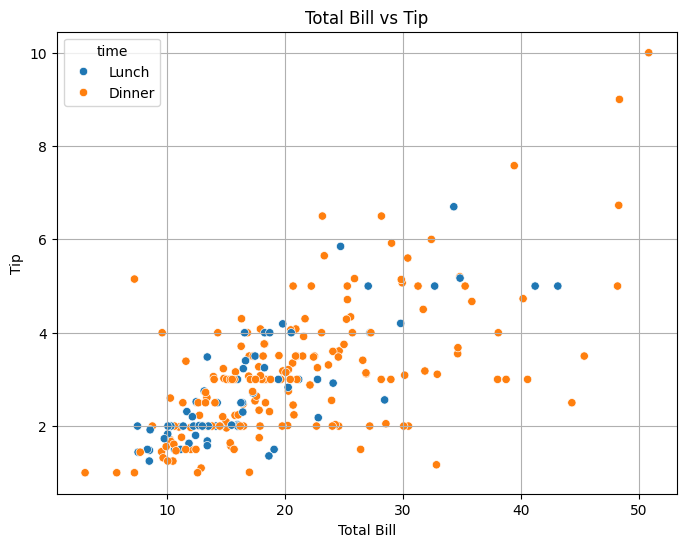

Correlation coefficient between Total Bill and Tip: 0.68


In [6]:
#load tips dataset from seaborn
tips = sns.load_dataset('tips')

#scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

#calculate correlation coefficient
correlation = tips['total_bill'].corr(tips['tip'])
print(f'Correlation coefficient between Total Bill and Tip: {correlation:.2f}')

In this plot, we see as the total bill increases, the tip also tends to increase, indicating a positive correlation. The correlation coefficient shown quantifies this relationship.

# Random Samples

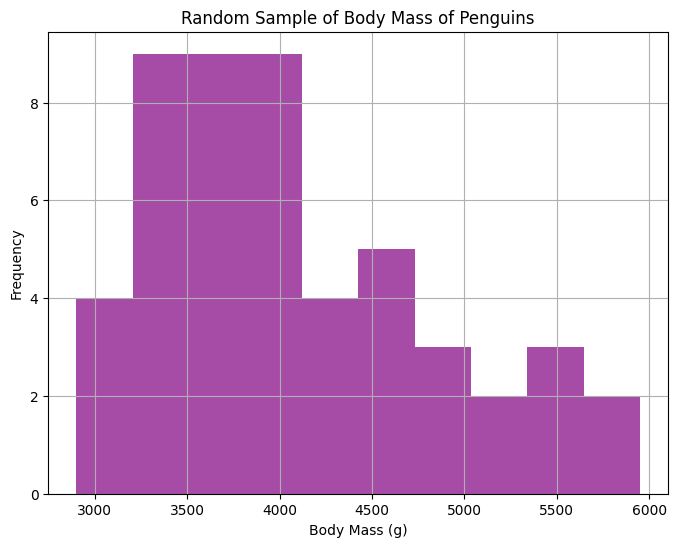

sample mean body mass: 4098.00 g
sample variance of body mass: 593822.45 g^2


In [7]:
import numpy as np

#load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()

#random sample of size 50 from the penguins dataset
random_sample = penguins.sample(n=50, random_state=42)

#plott histogram of body mass for random sample
plt.figure(figsize=(8, 6))
plt.hist(random_sample['body_mass_g'], bins=10, alpha=0.7, color='purple')
plt.title('Random Sample of Body Mass of Penguins')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#compute sample mean and variance
sample_mean = random_sample['body_mass_g'].mean()
sample_variance = random_sample['body_mass_g'].var()

print(f'sample mean body mass: {sample_mean:.2f} g')
print(f'sample variance of body mass: {sample_variance:.2f} g^2')

In this example, we randomly sample 50 penguins from the dataset and then compute statistics such as the mean and variance of their body mass.

This shows a practical approach to estimate properties of a larger population of penguins using a smaller subset.

## Central Limit Theorem
The **Central Limit Theorem** states that, for sufficiently large sample sizes, the distribution of the sample mean will be approximately normal, regardless of the original distribution. Let's verify this using the penguin body mass.

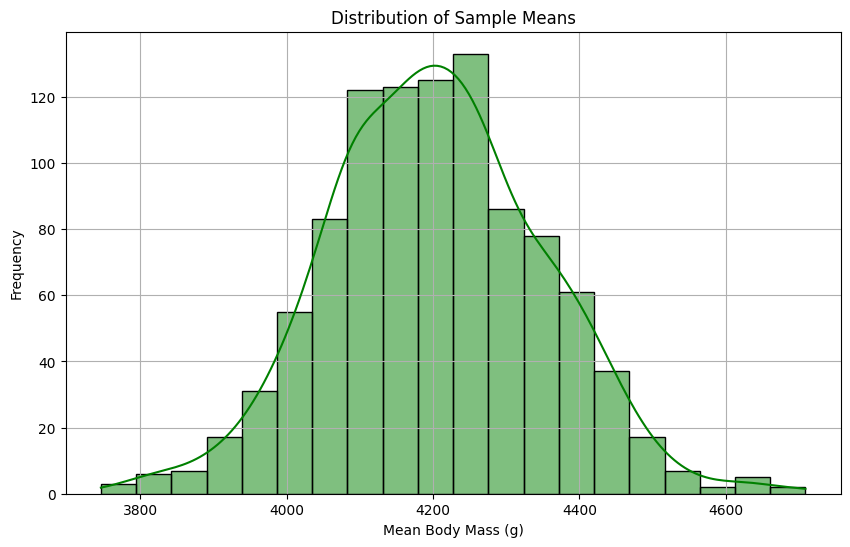

In [8]:
sample_size = 30  #size of each random sample
num_samples = 1000  #num of samples to take
sample_means = []

#generate random samples and compute their means
for _ in range(num_samples):
    sample = penguins['body_mass_g'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

#plotting histogram of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='green', bins=20)
plt.title('Distribution of Sample Means')
plt.xlabel('Mean Body Mass (g)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


As number of samples increase, the distribution of the sample means becomes more bell shaped, demonstrating the CLT. The more samples we take, the more the distribution of sample means resembles a normal distribution, with its mean approximately equal to the population mean.